In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv("/home/arshiaask/projects/Gold_Usd_Oil_IRR/datasets/advanced_gold_features.csv",
                parse_dates=True,
                index_col="Date")
df.head()

,Gold_Toman,USD_Toman,Ounce_Toman,Oil_Toman,SMA_7,SMA_30,EMA_12,EMA_26,MACD,MACD_Signal,...,USD_Toman_Lag_2,USD_Toman_Lag_3,USD_Toman_Lag_7,Ounce_Toman_Lag_1,Ounce_Toman_Lag_2,Ounce_Toman_Lag_3,Ounce_Toman_Lag_7,Gold_PCT_Change,USD_PCT_Change,Target_NextDay_Price
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-19,992300.0,22645.0,41655477.50,1265855.53,1.031643e+06,1.120649e+06,1.057194e+06,1.095848e+06,-38654.050402,-19989.774623,...,22947.0,23953.0,24874.0,40675145.97,42458835.22,44320237.07,47566551.41,3.128248,3.011418,1035200.0
2021-01-20,1035200.0,22787.0,42518263.86,1277895.00,1.021514e+06,1.117225e+06,1.053811e+06,1.091356e+06,-37545.325821,-23500.884863,...,21983.0,22947.0,24918.0,41655477.50,40675145.97,42458835.22,46088332.19,4.323289,0.627070,1035200.0
2021-01-21,1035200.0,22655.0,42258372.61,1270945.47,1.014714e+06,1.114069e+06,1.050947e+06,1.087196e+06,-36248.800001,-26050.467890,...,22645.0,21983.0,24443.0,42518263.86,41655477.50,40675145.97,45046005.30,0.000000,-0.579278,1054600.0
2021-01-23,1054600.0,23462.0,43763669.75,1316218.16,1.016929e+06,1.111315e+06,1.051509e+06,1.084782e+06,-33272.333332,-27494.840979,...,22787.0,22645.0,23854.0,42258372.61,42518263.86,41655477.50,44215773.82,1.874034,3.562128,1065000.0
2021-01-24,1065000.0,23354.0,43562217.34,1310159.36,1.020629e+06,1.108909e+06,1.053585e+06,1.083316e+06,-29731.542257,-27942.181234,...,22655.0,22787.0,23953.0,43763669.75,42258372.61,42518263.86,44320237.07,0.986156,-0.460319,1046500.0


In [4]:
df.shape

(1382, 29)

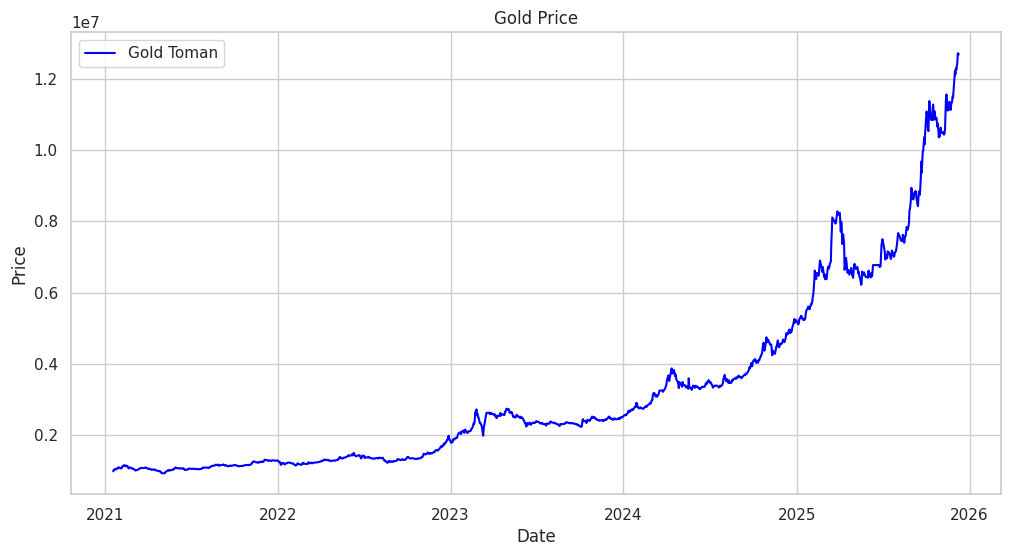

In [6]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Gold_Toman', label='Gold Toman', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price')
plt.show()

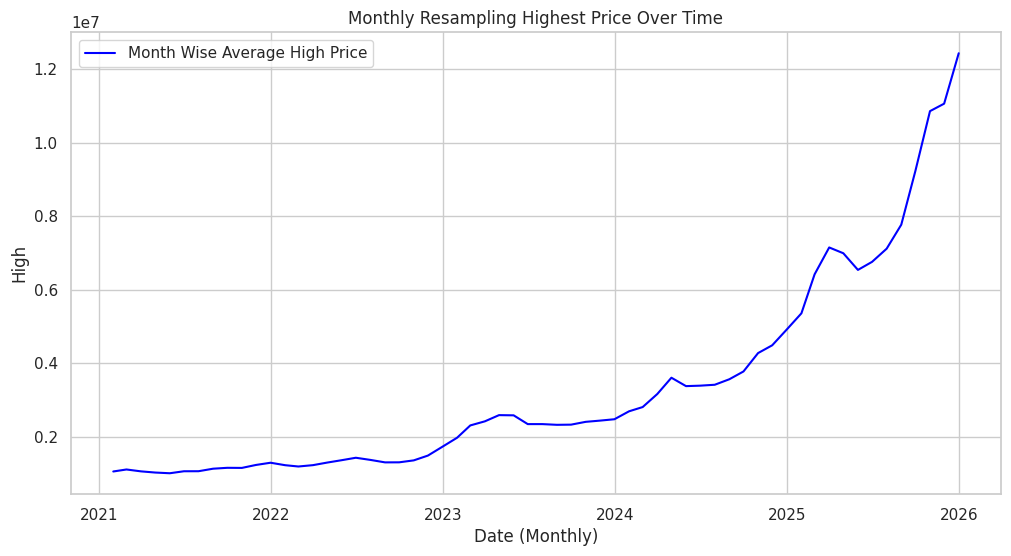

In [7]:
df_resampled = df.resample('ME').mean(numeric_only=True) 

sns.set(style="whitegrid") 

plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_resampled, x=df_resampled.index, y='Gold_Toman', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

Date is already the index or present in the DataFrame


<Figure size 1200x600 with 0 Axes>

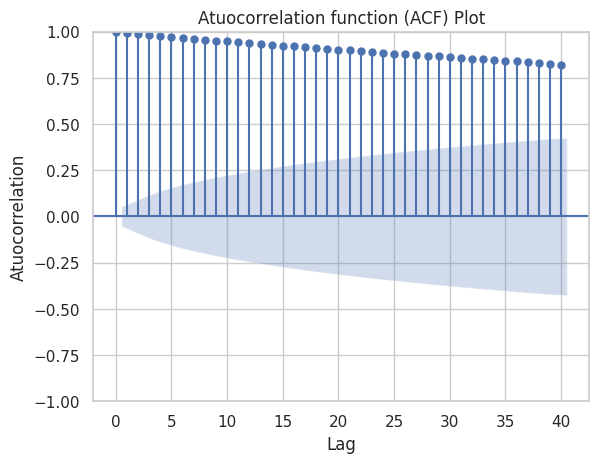

In [9]:
if 'Date' not in df.columns:
    print("Date is already the index or present in the DataFrame")
else:
    df.set_index('Date', inplace=True)
    
plt.figure(figsize=(12, 6))
plot_acf(df['Gold_Toman'], lags=40)
plt.xlabel("Lag")
plt.ylabel("Atuocorrelation")
plt.title("Atuocorrelation function (ACF) Plot")
plt.show()

In [10]:
result = adfuller(df['Gold_Toman'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 4.448596267088037
p-value: 1.0
Critical Values: {'1%': np.float64(-3.4351603284454986), '5%': np.float64(-2.863664398126376), '10%': np.float64(-2.567901029668299)}


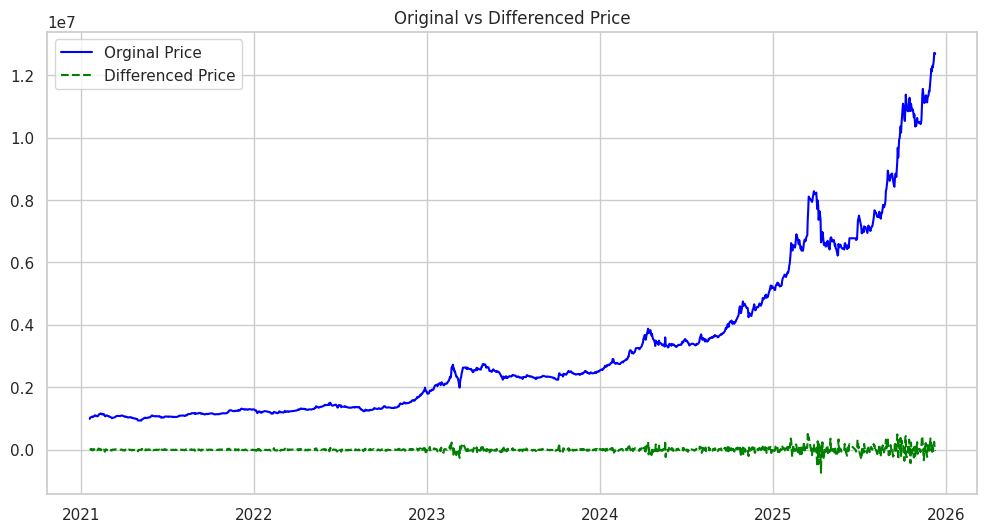

In [11]:
df['Gold_diff'] = df['Gold_Toman'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['Gold_Toman'], label='Orginal Price', color='blue')
plt.plot(df['Gold_diff'], label='Differenced Price', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced Price')
plt.show()

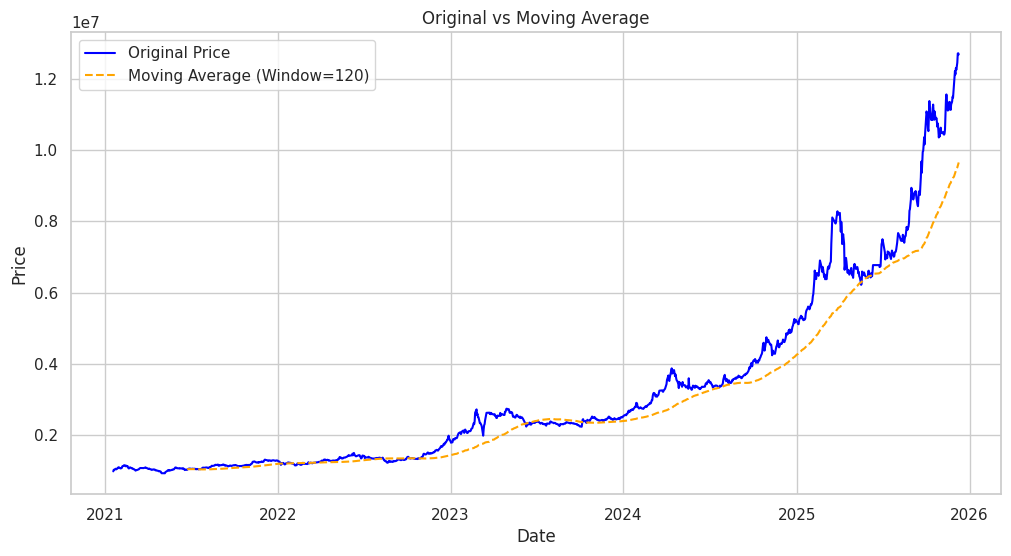

In [12]:
window_size = 120
df['Gold_smoothed'] = df['Gold_Toman'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['Gold_Toman'], label='Original Price', color='blue')
plt.plot(df['Gold_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [13]:
df_combined = pd.concat([df['Gold_Toman'], df['Gold_diff']], axis=1)
print(df_combined.head())

            Gold_Toman  Gold_diff
Date                             
2021-01-19    992300.0        NaN
2021-01-20   1035200.0    42900.0
2021-01-21   1035200.0        0.0
2021-01-23   1054600.0    19400.0
2021-01-24   1065000.0    10400.0


In [ ]:
df.dropna(subset=['Gold_diff'], inplace=True)